In [ ]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_openml
import random

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
#set all floats to max of 3 decimals
pd.options.display.float_format = "{:,.3f}".format

#1 Load the dataset and conduct any necessary preprocessing, such as normalizing the data.

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [ ]:
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


#2 Apply PCA to the data and get the first two principal components.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(X), columns=['0', '1'])
pca_components['target'] = y

exp_var_ratio = pca.explained_variance_ratio_
print(exp_var_ratio)

[0.29486711 0.17355895]


#3 Using the first two principal components, draw a graph of the data by coloring and labeling the data points as you did in the checkpoint.

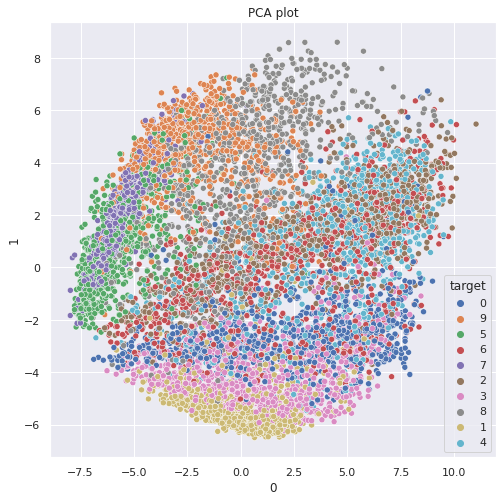

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='0', y='1', hue='target', data=pca_components, ax=ax)
plt.title('PCA plot')
plt.show()

#4 Do you think that the PCA solution is satisfactory? Can you easily distinguish between the different classes?

The classes seem to cluster somewhat together, but there is a lot of overlap and its not clear where one class begins and one ends. PCA does not seem that satisfactory when visualized. 